---


<center> <h2> <span style='color:#DF7F00'> Team 3: Heart Attack Analysis & Prediction Dataset  </span> </h2> </center>

---

In this Jupyter Notebook we will analyze [heart attack data](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

# Heart Attack Analysis


### Context
** To be updated **

The Challenge - Predict the probability (???) of a heart attack in a patient by using health data provided. The prediction should be made using a classification model to predict the likelihood of a heart attack. 
Challenge will be...

In addition, the following questions should be answered:

* Are there any features that point higher risk of heart attacks?
* Are heart attack risks different for each gender?
* Can the data be clustered to identify different profile groups?
* Train a classification model to predict the likelihood of a heart attack.
* What are the most important features?


### Content
The dataset can be found at:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

See also:
http://rstudio-pubs-static.s3.amazonaws.com/24341_184a58191486470cab97acdbbfe78ed5.html

And the processed Cleveland data from:
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Notes from the dataset give the following feature information: only 14 features used
 
* 3 (age) 
* 4 (sex) 
* 9 (cp) 
* 10 (trestbps) 
* 12 (chol) 
* 16 (fbs) 
* 19 (restecg) 
* 32 (thalach) 
* 38 (exang) 
* 40 (oldpeak) 
* 41 (slope) 
* 44 (ca) 
* 51 (thal) 
* 58 (num) (the predicted attribute) 

Complete feature documentation: 
* 3 age: age in years 
* 4 sex: sex (1 = male; 0 = female) 

* 9 cp: chest pain type 
    -- Value 1: typical angina 
    -- Value 2: atypical angina 
    -- Value 3: non-anginal pain 
    -- Value 4: asymptomatic 
* 10 trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
* 12 chol: serum cholestoral in mg/dl 
* 16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* 19 restecg: resting electrocardiographic results

    -- Value 0: normal 

    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
    
* 32 thalach: maximum heart rate achieved 
* 38 exang: exercise induced angina (1 = yes; 0 = no) 
* 40 oldpeak = ST depression induced by exercise relative to rest 
* 41 slope: the slope of the peak exercise ST segment 
    -- Value 1: upsloping 
    -- Value 2: flat 
    -- Value 3: downsloping 
* 44 ca: number of major vessels (0-3) colored by flourosopy 
* 51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
* 58 num: diagnosis of heart disease (angiographic disease status) 
    -- Value 0: < 50% diameter narrowing 
    -- Value 1: > 50% diameter narrowing 
    (in any major vessel: attributes 59 through 68 are vessels)

### Loading packages

In [45]:
# Core
import numpy as np
import pandas as pd
import os

# Supressing scientific notation in Pandas
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# print plots
%matplotlib inline 

# Machine Learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier, plot_importance
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay


# To supress warnings and deprecated messages
import warnings

warnings.filterwarnings("ignore")

### Loading data

In [46]:
clear all

In [47]:
data = pd.read_csv("processed.cleveland.data", header = None, names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"],)

In [48]:
print(data.shape)
data.head(15)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


The data contains 303 observations and 14 features. 

### Checking data types and info

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [50]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,303.0,NaN,NaN,NaN,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,NaN,NaN,NaN,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,NaN,NaN,NaN,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,NaN,NaN,NaN,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,NaN,NaN,NaN,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,NaN,NaN,NaN,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,NaN,NaN,NaN,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,NaN,NaN,NaN,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,NaN,NaN,NaN,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,NaN,NaN,NaN,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [51]:
data_selected = data.drop(columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
cols_selected= list(data_selected.columns)

for i in cols_selected:
    print(f'{i}: {data[i].unique()}')

sex: [1. 0.]
cp: [1. 4. 3. 2.]
fbs: [1. 0.]
restecg: [2. 0. 1.]
exang: [0. 1.]
slope: [3. 2. 1.]
ca: ['0.0' '3.0' '2.0' '1.0' '?']
thal: ['6.0' '3.0' '7.0' '?']
num: [0 2 1 3 4]


Note that columns 'ca' and 'thal' contain '?' and need to be replaced.

In [52]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [53]:
#cols_missing = ['ca','thal']

for i in ['ca', 'thal']: 
    print('Index Location of ?:')
    print(data.loc[data[i]=='?', i])
    print('Total number:')
    print(data[i].value_counts())
    print('-'*10)

#data.loc[data['thal']=='?', 'thal']


Index Location of ?:
166    ?
192    ?
287    ?
302    ?
Name: ca, dtype: object
Total number:
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64
----------
Index Location of ?:
87     ?
266    ?
Name: thal, dtype: object
Total number:
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64
----------


As the columns 'ca' and 'thal' are object types, the instances that have '?' can be replaced by the most frequent item in those columns. 
We see that for column 'ca' the most common item is 0, while for colum 'thal' the most common item is 3. 

Replacing missing values with most common values

In [54]:
print(data['ca'].mode())
print(data['thal'].mode())

0    0.0
Name: ca, dtype: object
0    3.0
Name: thal, dtype: object


In the cell below we first replace for NaN values and then replace those with the mode of each column:

In [55]:
data.loc[data['ca'] == '?', 'ca'] = data['ca'].mode()
data["ca"] = data["ca"].fillna(data["ca"].mode()[0])

data.loc[data['thal'] == '?', 'thal'] = data['thal'].mode()
data["thal"] = data["thal"].fillna(data["thal"].mode()[0])


In [59]:
data.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Checking duplicated values:

In [60]:
data.duplicated().sum()

0

There are no duplicated values in the data.

In [61]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,303.0,NaN,NaN,NaN,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,NaN,NaN,NaN,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,NaN,NaN,NaN,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,NaN,NaN,NaN,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,NaN,NaN,NaN,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,NaN,NaN,NaN,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,NaN,NaN,NaN,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,NaN,NaN,NaN,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,NaN,NaN,NaN,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,NaN,NaN,NaN,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Creating a copy of the data to work with:

In [62]:
data2 = data.copy()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


The data types are all numerical, including integers and float type. However, the following columns will probably work better if changed to the category type:

- sex 
- cp - chest pain
- fbs - fasting blood sugar
- restecg - resting electrocardiographic results
- exang - exercise induced angina
- slope - slope of the peak exercise ST segment
- ca - number of vessels
- thal 

In [63]:
cols_to_cat = ['sex', "cp", "restecg", "slope", "ca", "thal"]
cols_to_bol = ["fbs", "exang"]

for i in cols_to_cat:
    data2[i] = data2[i].astype("category")

for i in cols_to_bol:
    data2[i] = data2[i].astype("boolean")

Let's regroup the num column as any value >= 1 will indicate an angiographic disease status

In [64]:
data2['num'].replace([2,3,4], 1, inplace = True)
target = data2['num']
target.unique()

array([0, 1])

In [65]:
data2.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### Univariate analysis

Plotting all numerical features by output:

In [66]:
cols = list(data2.columns)

In [67]:
cols_num = list(data2.select_dtypes('float64'))
cols_cat = list(data2.select_dtypes(["object", "category"]))
cols_bol = list(data2.select_dtypes(["bool"]))

#### Numerical variables

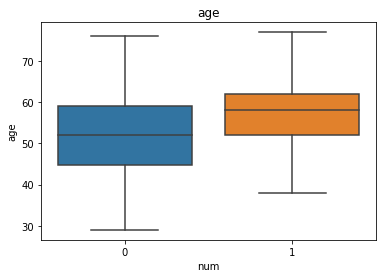

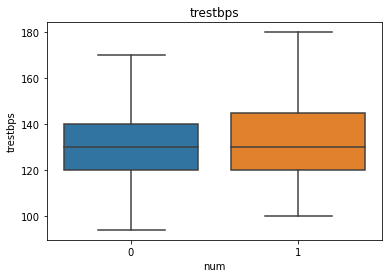

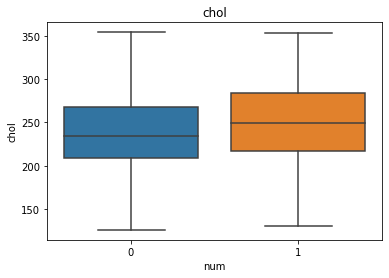

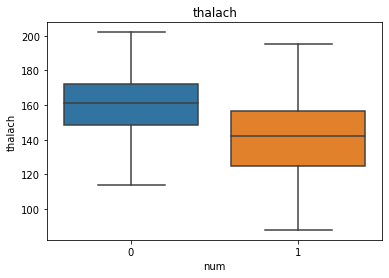

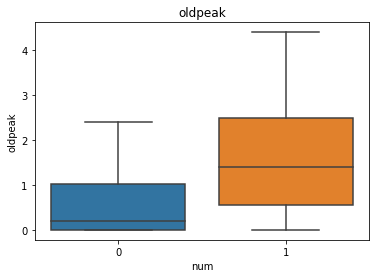

In [68]:
for i in cols_num:
    sns.boxplot(data = data2, x = "num", y = i, showfliers = False)
    plt.title(i)
    plt.show()

Certain feature might provide information as to what might lead to a num = 1 (more than 50% of diameter narrowing) from the graphs above, 

- Older age
- Achieving a lower maximum heart rate 
- Oldpeak, i.e. a higher ST depression induced by exercise relative to rest

Odly enough cholesterol differences didn't seem to have much of an effect

#### Categorical variables

Plotting all categorical features by output:

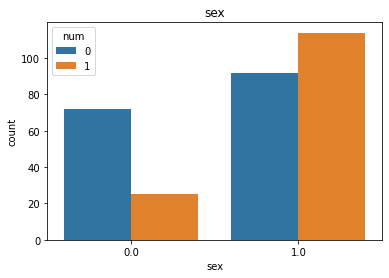

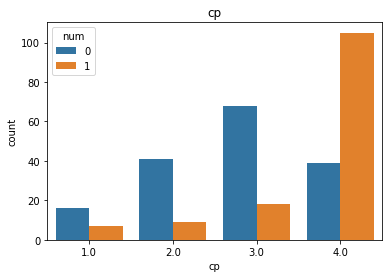

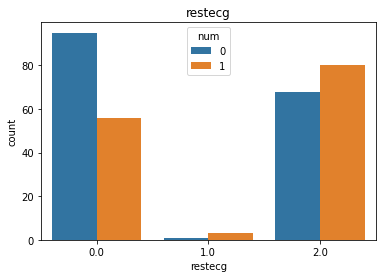

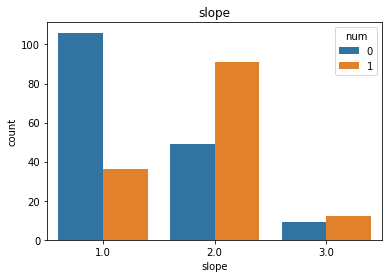

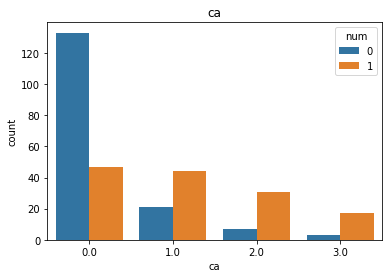

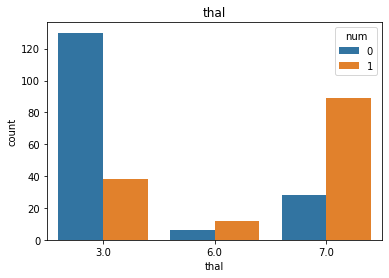

In [69]:
for i in cols_cat:
    sns.countplot(data = data2, x = i, hue = "num")
    plt.title(i)
    plt.show()

Among the categorical variables  males were most likely to have more than 50% of diameter narrowing, as well as people with asymptomatic chest pain, and a larger fraction of patients with resting electrocargiographic results that showed a probably or definite left ventricular hypertrophy, also, patients with a flat slope on the peak exercise ST segment, as well as a reversable defect (thal)

#### Boolean variables

Plotting all boolean columns by output:

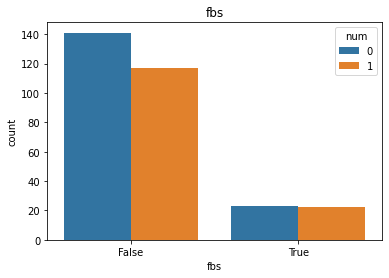

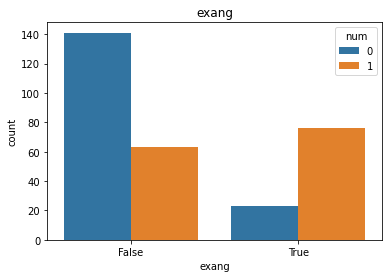

In [70]:
for i in cols_bol:
    sns.countplot(data = data2, x = i, hue = "num")
    plt.title(i)
    plt.show()

From the plots it is possible to see that for it is more likely to have more than 50% diameter narrowing for exercise induced anginas. 

### Multivariate analysis

#### Correlation plot

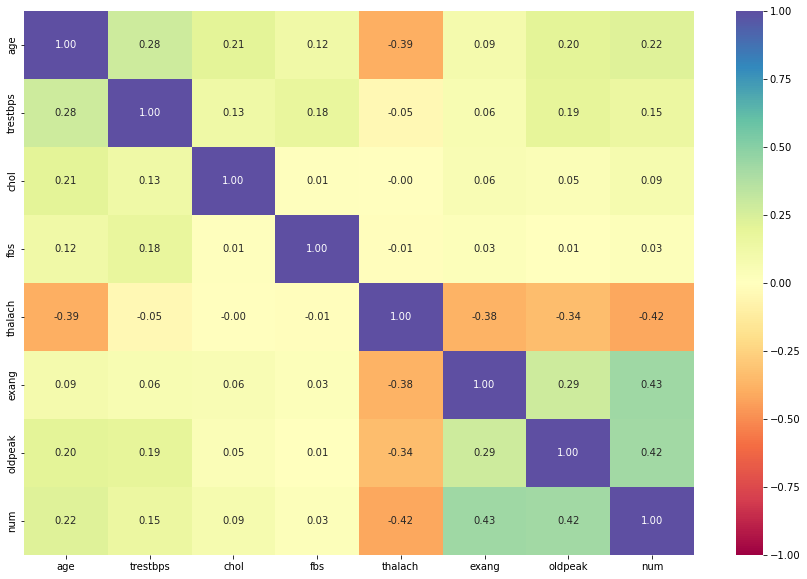

In [71]:
plt.figure(figsize = (15,10))
sns.heatmap(data = data2.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "Spectral");

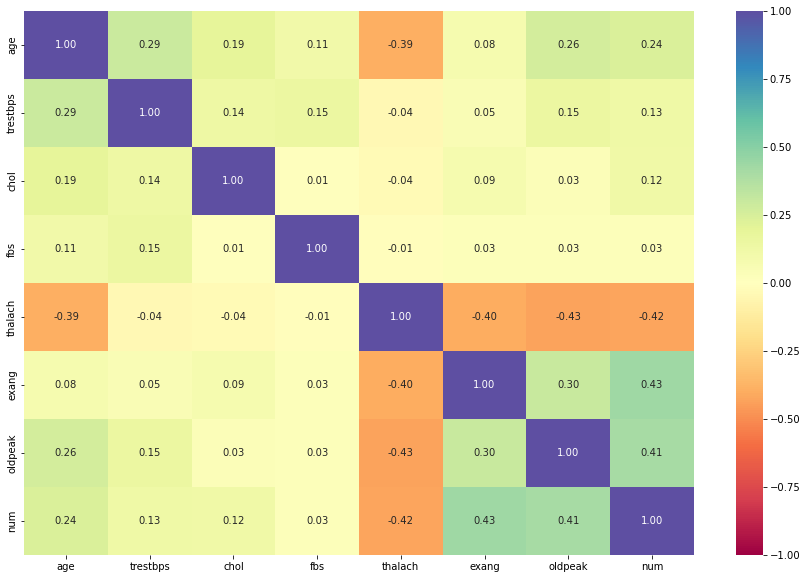

In [72]:
plt.figure(figsize = (15,10))
sns.heatmap(data = data2.corr(method = "spearman"), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "Spectral");

Conclusions from pair plots, there is a correlatio between the diagnosis of hear disease (num) and the exercise induced angina (exang) and the ST depression induced by exercise relative to rest (oldpeak). While there is an anticorrelation between num and maximum heart rate achieved (thalach)

#### Pair plot

In [73]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    boolean 
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    boolean 
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  num       303 non-null    int64   
dtypes: boolean(2), category(6), float64(5), int64(1)
memory usage: 18.2 KB


In [75]:
#data2[cols_num]
#sns.pairplot(data = data2[cols_num], hue = "num")

### Splitting the data into train and test

In [ ]:
#data2 = data2.reset_index(inplace=True)

In [76]:
features = list(data2.drop("num", axis = 1))
target = "num"
print(features)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [89]:
train, test = train_test_split(data2, test_size = 0.2, random_state = 10)

print(train.shape[0], test.shape[0], data.shape[0])
print(train.shape)
print(test.shape)
print(data.shape)

242 61 303
(242, 14)
(61, 14)
(303, 14)


### Logistic Regression

Let's try Logistic Regression from Scikit-Learn

In [79]:
data2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,303.0,NaN,NaN,NaN,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,2.0,1.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,303.0,4.0,4.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,303.0,NaN,NaN,NaN,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,NaN,NaN,NaN,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303,2,False,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,303.0,3.0,0.0,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,303.0,NaN,NaN,NaN,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303,2,False,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,303.0,NaN,NaN,NaN,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [80]:
# Training the model
model_lr = LogisticRegression(solver = "newton-cg", random_state = 666).fit(train[features], train[target])

In [81]:
lr_pred_train = model_lr.predict(train[features])
lr_pred_test = model_lr.predict(test[features])

In [82]:
lr_pred_test

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [84]:
def model_metrics(label, pred):

    # Compute metrics
    acc = accuracy_score(label, pred)
    recall = recall_score(label, pred, average='macro')
    precision = precision_score(label, pred, average='macro')
    f1 = f1_score(label, pred, average='macro')
    
    # Metrics to dictionary
    metrics_dict = {"Accuracy": acc,
                    "Recall": recall,
                    "Precision": precision,
                    "F1": f1}

    # creating a dataframe of metrics
    metrics_df = pd.DataFrame(metrics_dict, index = [0])

    return metrics_df

In [85]:
# Training metrics
model_metrics(train[target], lr_pred_train)

,Accuracy,Recall,Precision,F1
0,0.855372,0.851038,0.856373,0.852959


In [86]:
# Test metrics
model_metrics(test[target], lr_pred_test)

,Accuracy,Recall,Precision,F1
0,0.868852,0.86828,0.870671,0.868534


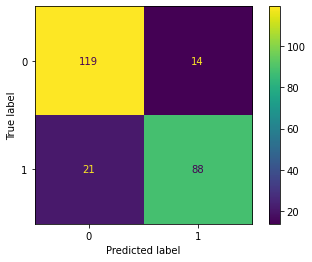

In [87]:
# Training data
ConfusionMatrixDisplay.from_predictions(train[target], lr_pred_train)

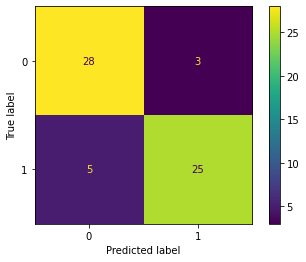

In [88]:
# Test data
ConfusionMatrixDisplay.from_predictions(test[target], lr_pred_test)